In [1]:
from lib import Compressors

In [ ]:
import torch

def hilbert_matrix(n, m):
    i = torch.arange(n, dtype=torch.float64).reshape(-1, 1)
    j = torch.arange(m, dtype=torch.float64).reshape(1, -1)
    H = 1.0 / (i + j + 1)
    return H

n = 512
m = 2048
k = 2048


H = hilbert_matrix(n, m)


# _, S, _ = torch.linalg.svd(H)

# print(S)

# _, S, _ = torch.linalg.svd(H @ H.T)

# print(S)


In [3]:
W = torch.randn(k, n)

A, B = Compressors.CORDA(W, H, 8)

print(torch.norm(A @ B))

tensor(142.5935)


In [4]:
A, B = Compressors.CORDA_ORIGINAL(W, H, 8)

print(torch.norm(A @ B))

tensor(69645.5391)


In [5]:
H = torch.randn(n, m)

In [6]:
A, B = Compressors.CORDA(W, H, 8)

print(torch.norm(A @ B))
A, B = Compressors.CORDA_ORIGINAL(W, H, 8)

print(torch.norm(A @ B))

tensor(159.6483)
tensor(159.6117)


In [7]:
A, B = Compressors.CORDA(W, H, 8)

print(torch.norm(A @ B))
A, B = Compressors.CORDA_ORIGINAL(W, H, 8)

print(torch.norm(A @ B))

tensor(159.9109)
tensor(159.6181)


In [8]:
torch.nn.init.kaiming_normal_(W)

_, S, _ = torch.linalg.svd(W)

print(S)

tensor([4.2288, 4.1751, 4.1555, 4.1478, 4.1408, 4.1256, 4.1226, 4.1003, 4.0897,
        4.0740, 4.0690, 4.0610, 4.0497, 4.0455, 4.0190, 4.0175, 4.0011, 3.9944,
        3.9864, 3.9838, 3.9715, 3.9620, 3.9564, 3.9443, 3.9411, 3.9389, 3.9199,
        3.9175, 3.9050, 3.8990, 3.8822, 3.8718, 3.8594, 3.8592, 3.8517, 3.8441,
        3.8375, 3.8290, 3.8242, 3.8165, 3.8094, 3.8068, 3.8005, 3.7943, 3.7883,
        3.7743, 3.7704, 3.7602, 3.7509, 3.7454, 3.7430, 3.7376, 3.7328, 3.7287,
        3.7173, 3.7092, 3.7046, 3.6982, 3.6940, 3.6849, 3.6809, 3.6756, 3.6704,
        3.6670, 3.6620, 3.6519, 3.6486, 3.6458, 3.6338, 3.6289, 3.6261, 3.6207,
        3.6119, 3.6081, 3.5945, 3.5861, 3.5835, 3.5778, 3.5741, 3.5685, 3.5602,
        3.5551, 3.5444, 3.5387, 3.5311, 3.5283, 3.5252, 3.5174, 3.5149, 3.5065,
        3.5014, 3.4981, 3.4878, 3.4845, 3.4778, 3.4705, 3.4617, 3.4569, 3.4529,
        3.4469, 3.4446, 3.4435, 3.4313, 3.4295, 3.4238, 3.4214, 3.4131, 3.4065,
        3.4004, 3.3978, 3.3900, 3.3828, 

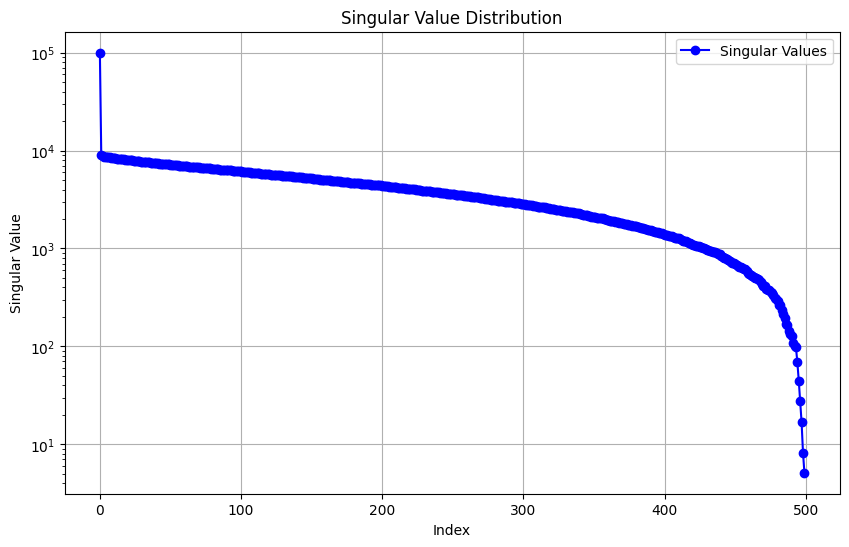

In [9]:
import torch
import matplotlib.pyplot as plt

# Генерация случайной матрицы из экспоненциального распределения
exp_distribution = torch.distributions.Exponential(rate=0.005)
exp_samples = exp_distribution.sample((500, 500))

# Выполнение сингулярного разложения
_, S, _ = torch.linalg.svd(exp_samples, full_matrices=False)

# Построение графика сингулярных чисел
plt.figure(figsize=(10, 6))
plt.plot(S.numpy(), 'o-', color='b', label='Singular Values')
plt.title('Singular Value Distribution')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.yscale('log')  # Использование логарифмической шкалы для Y
plt.grid(True)
plt.legend()
plt.show()

In [10]:
H = exp_samples
W = torch.randn(600, 500)
A, B = Compressors.CORDA(W, H, 8)

print(torch.norm(A @ B))
A, B = Compressors.CORDA_ORIGINAL(W, H, 8)

print(torch.norm(A @ B))

tensor(103.3299)
tensor(200.8146)


In [29]:
import pickle

with open(f'./results/initialization/X.pkl', 'rb') as file:
        logs = pickle.load(file)

print(logs)


{'X': {'model.layers.0.self_attn.q_proj': tensor([[ 0.0213,  0.0213,  0.0213,  ..., -0.1421, -0.1421, -0.1421],
        [ 0.0289,  0.0289,  0.0289,  ...,  0.3080,  0.3080,  0.3080],
        [-0.0893, -0.0893, -0.0893,  ..., -0.1992, -0.1992, -0.1992],
        ...,
        [ 0.0120,  0.0120,  0.0120,  ..., -0.0713, -0.0713, -0.0713],
        [ 0.0087,  0.0087,  0.0087,  ..., -0.0733, -0.0733, -0.0733],
        [ 0.0119,  0.0119,  0.0119,  ..., -0.0879, -0.0879, -0.0879]]), 'model.layers.0.self_attn.k_proj': tensor([[ 0.0213,  0.0213,  0.0213,  ..., -0.1421, -0.1421, -0.1421],
        [ 0.0289,  0.0289,  0.0289,  ...,  0.3080,  0.3080,  0.3080],
        [-0.0893, -0.0893, -0.0893,  ..., -0.1992, -0.1992, -0.1992],
        ...,
        [ 0.0120,  0.0120,  0.0120,  ..., -0.0713, -0.0713, -0.0713],
        [ 0.0087,  0.0087,  0.0087,  ..., -0.0733, -0.0733, -0.0733],
        [ 0.0119,  0.0119,  0.0119,  ..., -0.0879, -0.0879, -0.0879]]), 'model.layers.0.self_attn.v_proj': tensor([[ 0.0213, 

In [52]:
X = logs['X']['model.layers.8.self_attn.q_proj']

print(X.shape)

torch.Size([2048, 24576])


In [53]:
C = X.float() @ X.float().T
_, S, _ = torch.linalg.svd(C.float())
print(S)

tensor([9.3950e+06, 4.7052e+05, 3.7342e+05,  ..., 2.6769e+00, 2.0316e+00,
        1.9746e+00])


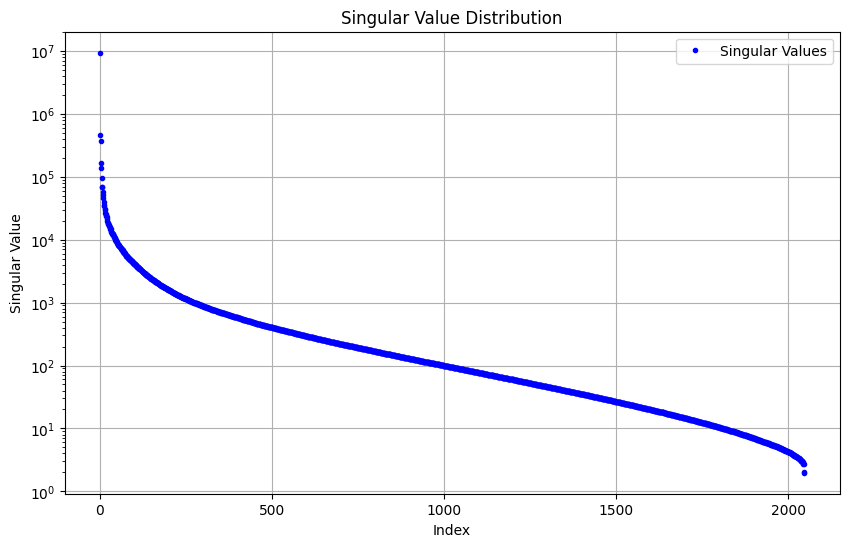

In [54]:
# Построение графика сингулярных чисел
plt.figure(figsize=(10, 6))
plt.plot(S.numpy(), '.', color='b', label='Singular Values')
plt.title('Singular Value Distribution')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.yscale('log')  # Использование логарифмической шкалы для Y
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt
import pickle

with open('./results/initialization/singulars.pkl', 'rb') as file:
    logs = pickle.load(file)


sorted_data = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
}

for key, value in logs['W_s'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    sorted_data[category].append((layer_num, value))

for category in sorted_data:
    sorted_data[category].sort(key=lambda x: x[0])


[10.351022720336914, 5.5038228034973145, 5.29900598526001, 5.116588592529297, 5.068792819976807, 4.9699387550354, 4.650820255279541, 4.602141857147217, 4.478029727935791, 4.45214319229126, 4.3423614501953125, 4.292910575866699, 4.263477802276611, 4.231962203979492, 4.177314758300781, 4.095607757568359, 4.062241077423096, 4.031864166259766, 4.020370960235596, 3.978729486465454, 3.945784091949463, 3.8795981407165527, 3.8505260944366455, 3.829524040222168, 3.795332193374634, 3.771944522857666, 3.7451260089874268, 3.716273069381714, 3.6749672889709473, 3.6515777111053467, 3.6386878490448, 3.5935096740722656, 3.5774073600769043, 3.550076484680176, 3.5273492336273193, 3.476577043533325, 3.4692904949188232, 3.4405698776245117, 3.4344611167907715, 3.4004290103912354, 3.378840446472168, 3.356376886367798, 3.3354544639587402, 3.3157830238342285, 3.264463424682617, 3.2507283687591553, 3.247821569442749, 3.209892511367798, 3.1976993083953857, 3.1798298358917236, 3.156879425048828, 3.14699435234069

[2.6630306243896484, 2.107180118560791, 2.0843007564544678, 2.0688910484313965, 2.047211170196533, 2.030850887298584, 2.0257768630981445, 2.0181565284729004, 2.005342483520508, 1.9974610805511475, 1.9722940921783447, 1.960254192352295, 1.9551962614059448, 1.9378947019577026, 1.934812068939209, 1.9049168825149536, 1.8967543840408325, 1.8912789821624756, 1.8848994970321655, 1.8552528619766235, 1.8174718618392944, 1.8053869009017944, 1.8010493516921997, 1.7970904111862183, 1.7937309741973877, 1.7814725637435913, 1.7590179443359375, 1.7471181154251099, 1.7441184520721436, 1.7319860458374023, 1.7192522287368774, 1.715927004814148, 1.7068829536437988, 1.6938635110855103, 1.69276762008667, 1.6747153997421265, 1.670470952987671, 1.660563349723816, 1.657975196838379, 1.6512413024902344, 1.6481138467788696, 1.622328758239746, 1.6182628870010376, 1.6171112060546875, 1.612273097038269, 1.6103025674819946, 1.605637550354004, 1.5992029905319214, 1.5945508480072021, 1.5862517356872559, 1.582110047340

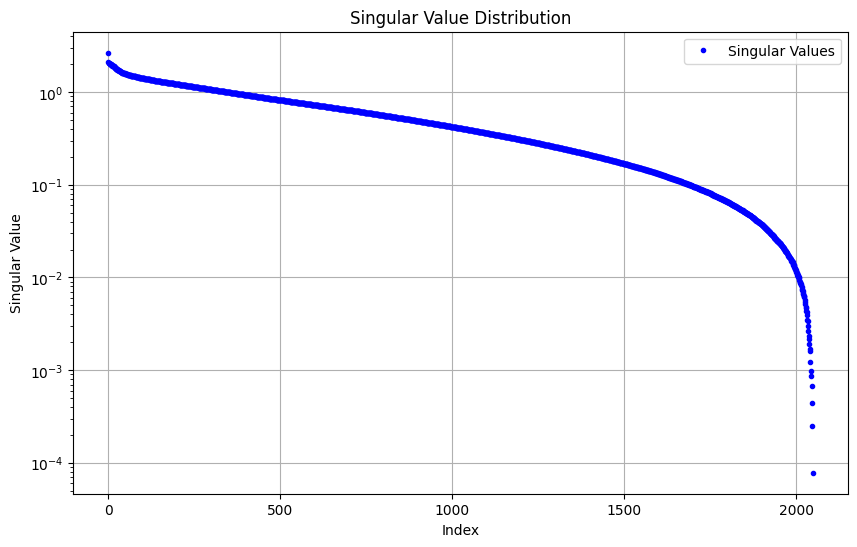

In [27]:
S = sorted_data['o_proj'][9][1]
print(S)

plt.figure(figsize=(10, 6))
plt.plot(S, '.', color='b', label='Singular Values')
plt.title('Singular Value Distribution')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.yscale('log')  # Использование логарифмической шкалы для Y
plt.grid(True)
plt.legend()
plt.show()